importing required module for Apriori Algorithm for Data Mining

In [1]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. Apriori Algorithm (Association Rule Mining):-The Apriori algorithm is a fundamental technique in data mining for association rule mining. It identifies frequent itemsets in a dataset and generates association rules based on those itemsets.


In [3]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Sample transactions
dataset = [['milk', 'bread', 'nuts'],
           ['milk', 'bread'],
           ['milk', 'bread', 'butter'],
           ['bread', 'butter'],
           ['milk', 'bread', 'butter', 'nuts']]

# Encoding
te = TransactionEncoder()
te_data = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_data, columns=te.columns_)

# Apply Apriori
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print("Frequent Itemsets:\n", frequent_itemsets)
print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Frequent Itemsets:
    support         itemsets
0      1.0          (bread)
1      0.6         (butter)
2      0.8           (milk)
3      0.6  (butter, bread)
4      0.8    (milk, bread)

Association Rules:
   antecedents consequents  support  confidence  lift
0    (butter)     (bread)      0.6         1.0   1.0
1     (bread)    (butter)      0.6         0.6   1.0
2      (milk)     (bread)      0.8         1.0   1.0
3     (bread)      (milk)      0.8         0.8   1.0


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


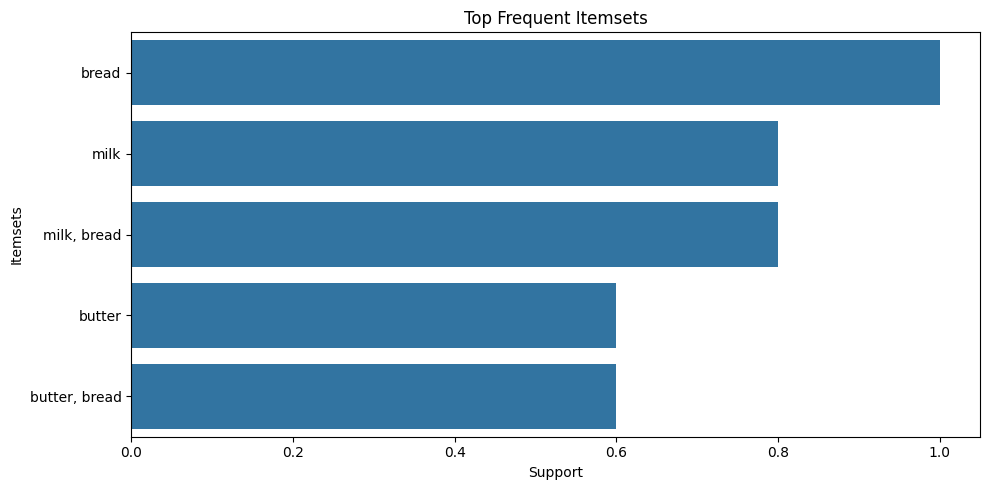

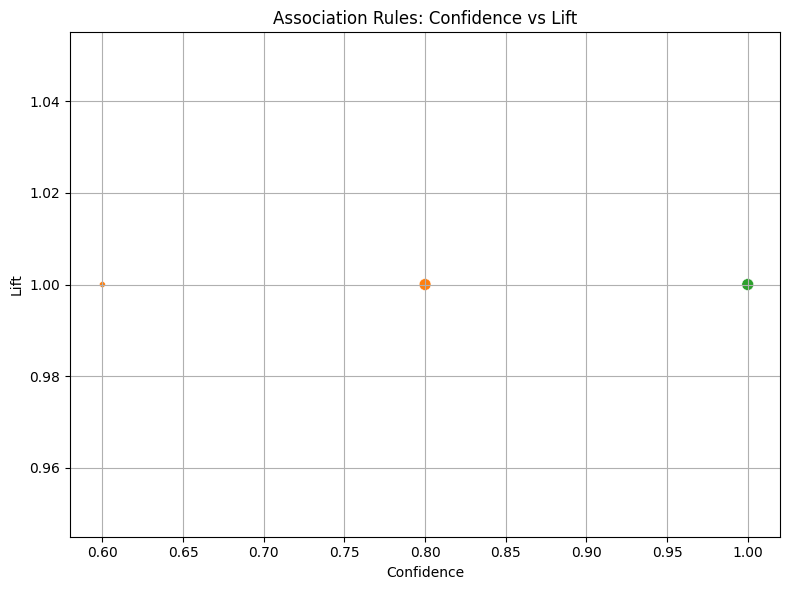

In [4]:
# Top Frequent Itemsets
plt.figure(figsize=(10,5))
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
top_items = frequent_itemsets.sort_values(by='support', ascending=False).head(10)

sns.barplot(data=top_items, x='support', y=top_items['itemsets'].apply(lambda x: ', '.join(list(x))))
plt.title('Top Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.tight_layout()
plt.show()

#  Association Rules
plt.figure(figsize=(8,6))
sns.scatterplot(x='confidence', y='lift', size='support', data=rules, hue='antecedents', palette='tab10', legend=False)
plt.title('Association Rules: Confidence vs Lift')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.grid(True)
plt.tight_layout()
plt.show()
